# EDA

2014年のデータについて分析する。  
はじめは1月分から始める。


In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../..')

from src.utils.io import load_month_data

In [3]:
# 1月のデータの全体像
df_1 = load_month_data(2014, 1)

Loading: [PosixPath('/app/data/raw/2014-citibike-tripdata/1_January/201401-citibike-tripdata_1.csv')]


# データの整理

| **カラム名** | **説明** |
| --- | --- |
| **tripduration** | ライドの継続時間（秒単位）。 |
| **starttime** | ライドが開始した日時。 |
| **stoptime** | ライドが終了した日時。 |
| **start station id** | ライド開始地点のステーションID。 |
| **start station name** | ライド開始地点のステーション名。 |
| **start station latitude** | ライド開始地点の緯度。 |
| **start station longitude** | ライド開始地点の経度。 |
| **end station id** | ライド終了地点のステーションID。 |
| **end station name** | ライド終了地点のステーション名。 |
| **end station latitude** | ライド終了地点の緯度。 |
| **end station longitude** | ライド終了地点の経度。 |
| **bikeid** | 使用された自転車のID。 |
| **usertype** | ユーザーのタイプ（例: **Subscriber** (定期会員) または **Customer** (短期利用者)）。 |
| **birth year** | ユーザーの誕生年。 |
| **gender** | ユーザーの性別（通常は **0** (不明/その他)、**1** (男性)、**2** (女性) でエンコードされています）。 |

In [4]:
df_1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300400 entries, 0 to 300399
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             300400 non-null  int64  
 1   starttime                300400 non-null  object 
 2   stoptime                 300400 non-null  object 
 3   start station id         300400 non-null  int64  
 4   start station name       300400 non-null  object 
 5   start station latitude   300400 non-null  float64
 6   start station longitude  300400 non-null  float64
 7   end station id           300400 non-null  int64  
 8   end station name         300400 non-null  object 
 9   end station latitude     300400 non-null  float64
 10  end station longitude    300400 non-null  float64
 11  bikeid                   300400 non-null  int64  
 12  usertype                 300400 non-null  object 
 13  birth year               300400 non-null  object 
 14  gend

In [6]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,300400.0,733.968945,5271.463917,60.000000,340.000000,513.000000,788.000000,1.990440e+06
start station id,300400.0,436.936598,323.895643,72.000000,306.000000,406.000000,490.000000,3.002000e+03
start station latitude,300400.0,40.734996,0.019408,40.680342,40.722055,40.737050,40.750224,4.077051e+01
start station longitude,300400.0,-73.990135,0.011779,-74.017134,-73.998102,-73.990093,-73.981854,-7.395005e+01
end station id,300400.0,437.742763,328.931404,72.000000,306.000000,405.000000,489.000000,3.002000e+03
end station latitude,300400.0,40.734814,0.019383,40.680342,40.721816,40.736529,40.750200,4.077051e+01
end station longitude,300400.0,-73.990328,0.011854,-74.017134,-73.998522,-73.990214,-73.981854,-7.395005e+01
bikeid,300400.0,17992.082044,2000.832564,14529.000000,16249.000000,17971.000000,19700.000000,2.153600e+04
gender,300400.0,1.165632,0.431966,0.000000,1.000000,1.000000,1.000000,2.000000e+00


# 基本統計の確認

## チェックリスト

- tripduration
  - 平均値、最大値がおかしくないか

- 緯度、軽度、場所IDは数値に意味はない

- bikeid
  - 使われる台数のスケール感チェック（unique台数）

- gender
  - 実質カテゴリ変数

## 結果

### tripduration

- 平均は8分前後。
- 360分(99.9%)以上は考えなくてよさそう。
- 分布を見て、長時間の利用と短時間の利用で目的が違うはずなので分けて特徴量を確認する。
- 会員、非会員で大きく偏りがある。40:1

In [7]:
df_1["tripduration_min"] = df_1["tripduration"]/60

In [8]:
df_1["tripduration_min"].describe(percentiles=[0.5, 0.9, 0.99, 0.999])

count    300400.000000
mean         12.232816
std          87.857732
min           1.000000
50%           8.550000
90%          20.000000
99%          41.216667
99.9%       361.526767
max       33174.000000
Name: tripduration_min, dtype: float64

In [10]:
df_1["tripduration_min"]

0          7.850000
1         24.900000
2          7.733333
3          6.216667
4         11.000000
            ...    
300395    13.000000
300396    17.900000
300397     3.183333
300398    17.533333
300399    18.883333
Name: tripduration_min, Length: 300400, dtype: float64

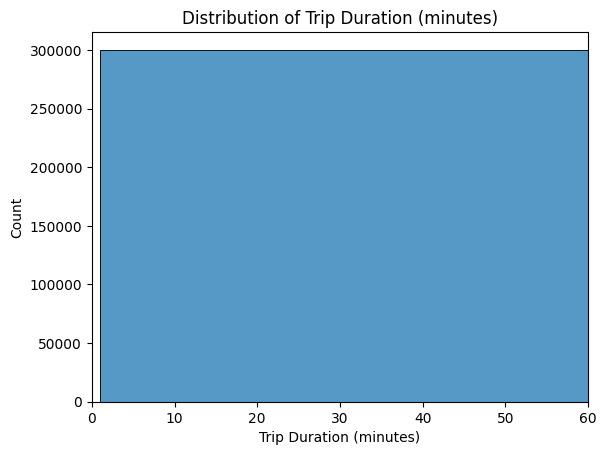

In [19]:
# 分布を確認
# これだと何もわからない

sns.histplot(data=df_1, x='tripduration_min', bins=50)
plt.xlabel("Trip Duration (minutes)")
plt.xlim(0, 60)  # 1時間以内を可視化
plt.title("Distribution of Trip Duration (minutes)")
plt.show()

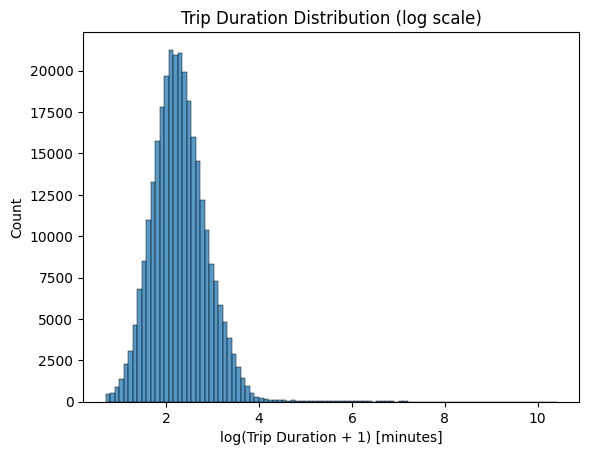

In [18]:
# 対数スケールを確認

sns.histplot(np.log1p(df_1["tripduration_min"]), bins=100)
plt.xlabel("log(Trip Duration + 1) [minutes]")
plt.title("Trip Duration Distribution (log scale)")
plt.show()

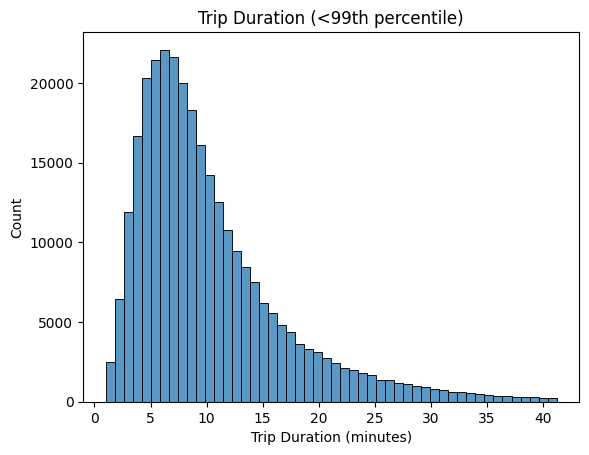

In [20]:
# 上位1%カット
threshold = df_1["tripduration_min"].quantile(0.99)
sns.histplot(x=df_1[df_1["tripduration_min"] < threshold]["tripduration_min"], bins=50)
plt.xlabel("Trip Duration (minutes)")
plt.title("Trip Duration (<99th percentile)")
plt.show()

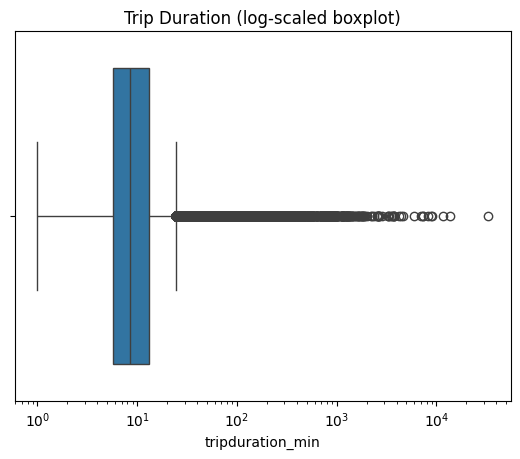

In [22]:
# 箱ひげ図

sns.boxplot(x=df_1["tripduration_min"])
plt.xscale("log")  
plt.title("Trip Duration (log-scaled boxplot)")
plt.show()

In [24]:
counts = {
    "1時間以上": (df_1["tripduration"] > 3600).sum(),
    "1日以上": (df_1["tripduration"] > 86400).sum()
}
for label, count in counts.items():
    print(f"{label}: {count} 件")


1時間以上: 1430 件
1日以上: 52 件


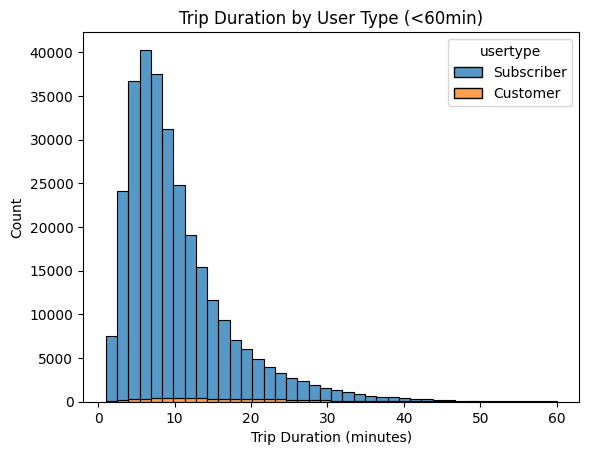

usertype
Subscriber    293146
Customer        7254
Name: count, dtype: int64

In [30]:
# 会員、非会員を分けた利用時間の分布を確認

sns.histplot(
    data=df_1[df_1["tripduration_min"] < 60],  # 短時間利用に限定
    x="tripduration_min",
    hue="usertype",
    bins=40,
    multiple="stack"
)
plt.title("Trip Duration by User Type (<60min)")
plt.xlabel("Trip Duration (minutes)")
plt.show()

df_1["usertype"].value_counts()

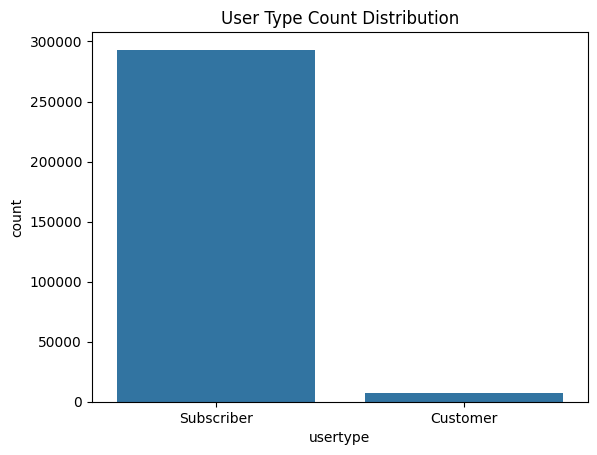

usertype
Subscriber    97.58522
Customer       2.41478
Name: proportion, dtype: float64

In [31]:
sns.countplot(data=df_1, x="usertype")
plt.title("User Type Count Distribution")
plt.show()

df_1["usertype"].value_counts(normalize=True) * 100

## 比率を補正して比較

会員側をランダムサンプリングしてEDAをしてみる。

### 結果

ランダムサンプリングした後の利用時間の分布の特徴は

- 会員は短時間（~20分）が多い
- 非会員は（~30分）がボリュームゾーン、長時間利用も多い

In [37]:
n = df_1[df_1["usertype"] == "Customer"].shape[0]

df_balanced = pd.concat([
    df_1[df_1["usertype"] == "Subscriber"].sample(n, random_state=42),
    df_1[df_1["usertype"] == "Customer"]
])

print(df_balanced["usertype"].value_counts())

usertype
Subscriber    7254
Customer      7254
Name: count, dtype: int64


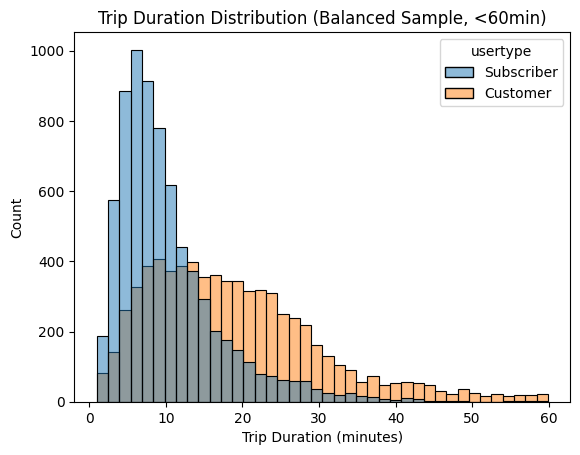

In [40]:
sns.histplot(
    data=df_balanced[df_balanced["tripduration_min"] < 60],
    x="tripduration_min",
    hue="usertype",
    bins=40,
    # multiple="stack"
)
plt.title("Trip Duration Distribution (Balanced Sample, <60min)")
plt.xlabel("Trip Duration (minutes)")
plt.show()